Text(0, 0.5, '$p_Y(x_i)$')

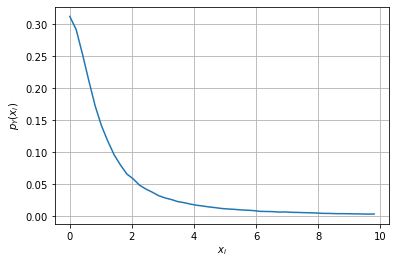

In [23]:
maxrange=50
maxlim=10
x = np.linspace(0,maxlim,maxrange)
simlen = int(1e6)
err = [] 
pdf = []

randvar = np.random.standard_cauchy(simlen)

for i in range(0,maxrange):
    err_ind = np.nonzero((1-randvar)/(1+randvar) < x[i]) #checking probability condition
    err_n = np.size(err_ind) #computing the probability
    err.append(err_n/simlen) #storing the probability values in a list

for i in range(0,maxrange-1):
    test = (err[i+1]-err[i])/(x[i+1]-x[i])
    pdf.append(test) #storing the pdf values in a list

plt.plot(x.T[0:(maxrange-1)],pdf)
plt.grid()
plt.xlabel('$x_i$')
plt.ylabel('$p_Y(x_i)$')

Text(0, 0.5, '$F_Y(x)$')

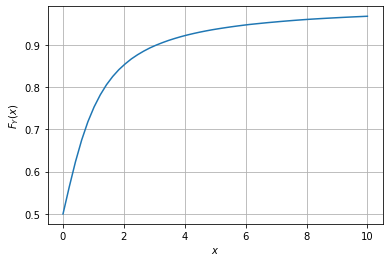

In [24]:
plt.plot(x.T,err)#plotting the CDF
plt.grid() #creating the grid
plt.xlabel('$x$')
plt.ylabel('$F_Y(x)$')